In [61]:
# retina
%config InlineBackend.figure_format = 'retina'

In [62]:
%load_ext autoreload
%autoreload 2

In [63]:
import os
from pathlib import Path
import pickle
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.table import Table
import eazy

from matplotlib import rcParams
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 25

WD = Path('/data1/hbahk/spherex-photoz/spherex-challenge/challenge')
OUTDIR = WD / 'output_combined'
os.chdir(WD)

from utils import plot_comp_hexbin

In [64]:
# make the master output table
base = Table.read(WD/'data/fiducial102_reduced.fits')

base['z_true'] = base['z_true'][:,0]
base['HSC_i_MAG'] = base['HSC_i_MAG'][:,0]

base[:5]

<Table length=5>
source_id    x       y        HSC_i_MAG       z_true FLAG_ML
  int64   float64 float64      float64       float64 float64
--------- ------- ------- ------------------ ------- -------
   180642     0.0     0.0 23.561245805944896  0.7599     0.0
   180650     0.0     0.0 22.238483110379896  0.7945     0.0
   180651     0.0     0.0 24.799673329369853  0.8346     0.0
   180654     0.0     0.0 24.236406897361483  1.3229     0.0
   180657     0.0     0.0 24.744050892069353  2.5462     1.0

In [65]:
output1 = Table.read(OUTDIR/'output16.fits')
output1[:5]

<Table length=5>
  id    z_spec ...                  ABSM_274                 
               ...                                           
int64  float64 ...                 float64[5]                
------ ------- ... ------------------------------------------
382728  2.5891 ...                    -- .. -18.7497998871574
382733  0.3476 ... -17.245618836757785 .. -20.647399918911105
382741  0.7581 ...                   -- .. -19.82214623722529
382746  0.8049 ...                  -- .. -14.425025820574028
382749  1.0188 ...                  -- .. -17.325196374896635

In [22]:
colnames = ['z_phot', 'z_phot_chi2', 'z160', 'z840', 'id']
for label in colnames:
    base[label] = np.empty(len(base), dtype=float)

for i in range(17):
    start_id = i*10000
    end_id = (i+1)*10000 if i < 16 else len(base)
    
    outtab = Table.read(OUTDIR/f'output{i:02d}.fits')
    for label in colnames:
        base[label][start_id:end_id] = outtab[label]

In [23]:
base.write(OUTDIR/'result.fits', overwrite=True)

In [66]:
base = Table.read(OUTDIR/'result.fits')

Objects : 163542
Outliers: 109150




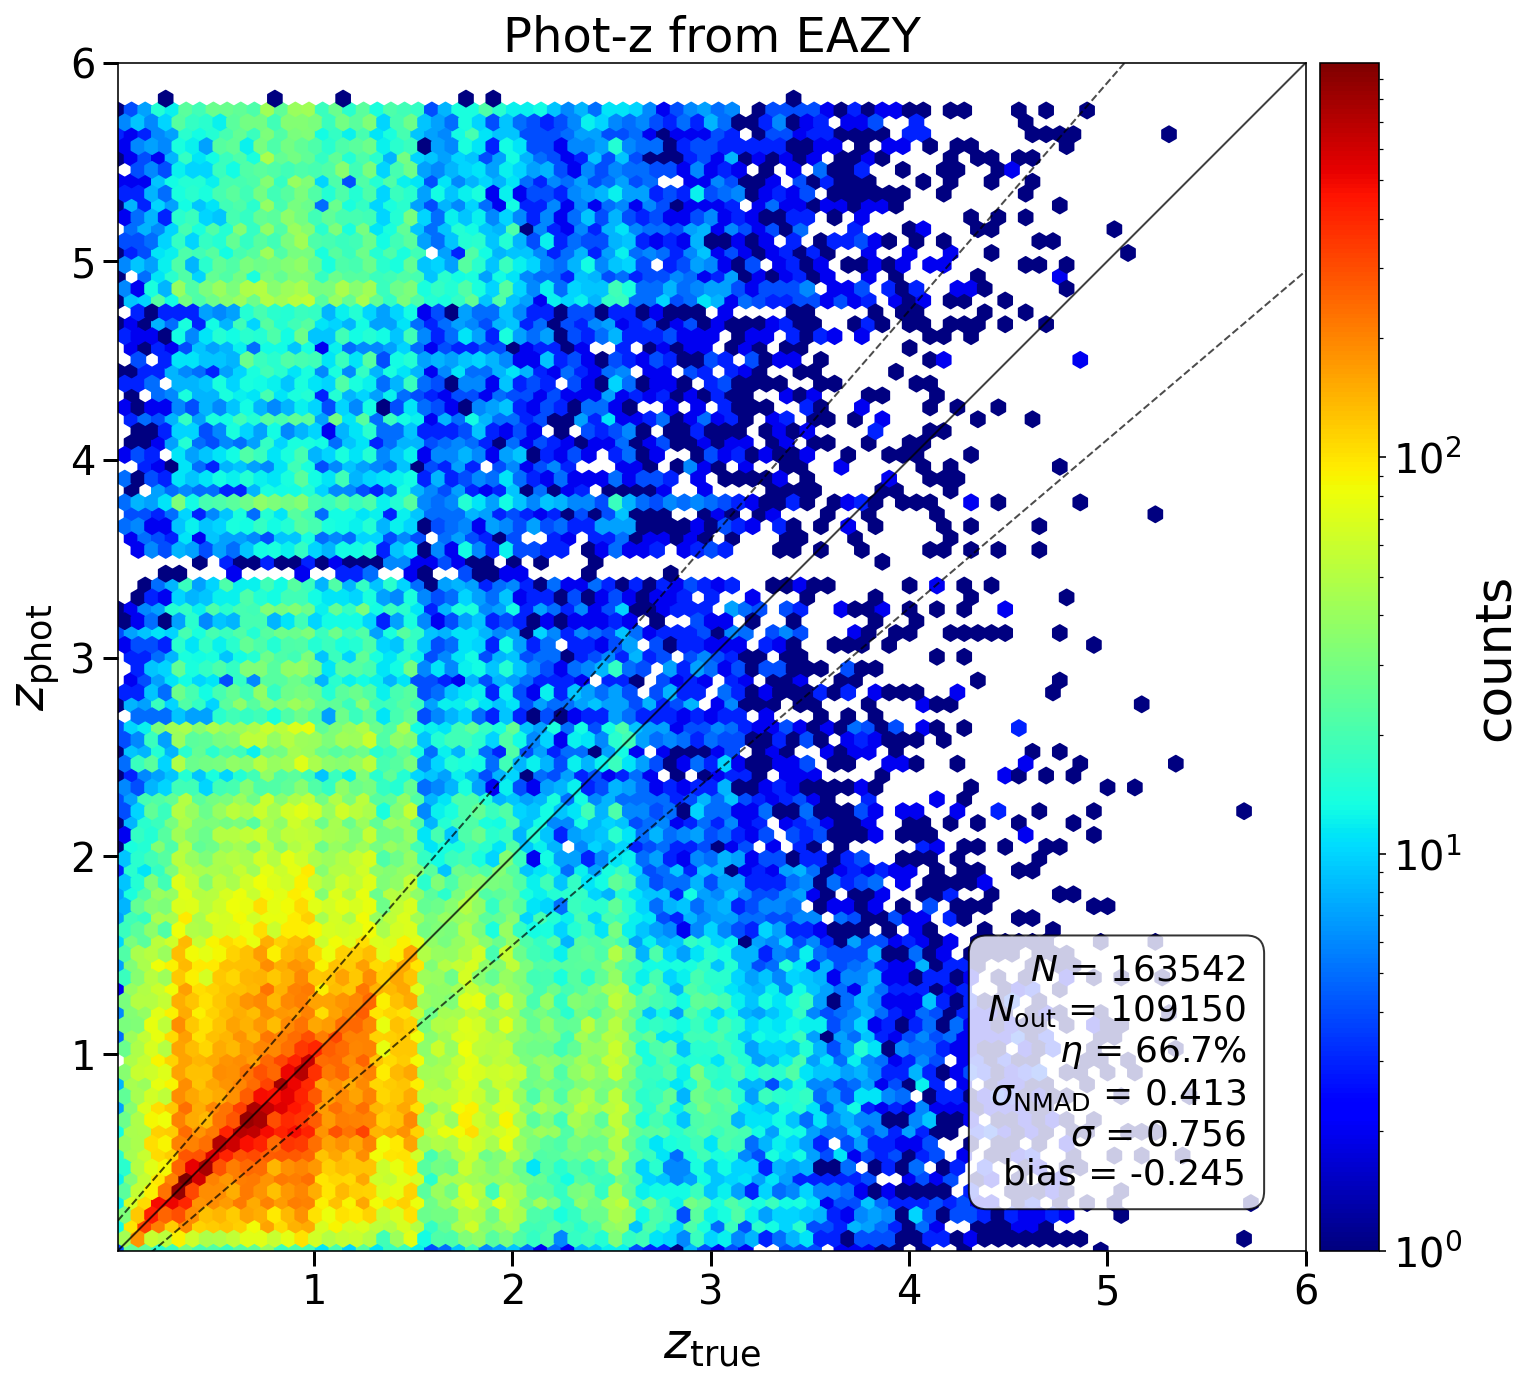

In [26]:
id_out = plot_comp_hexbin(base['z_true'], base['z_phot'], base['z_phot_chi2'],
                          'Fig1-comp_z_eazypy.png', base['id'],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="Phot-z from EAZY", xmin=0.01, xmax=6.0, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

Objects : 356
Outliers: 0




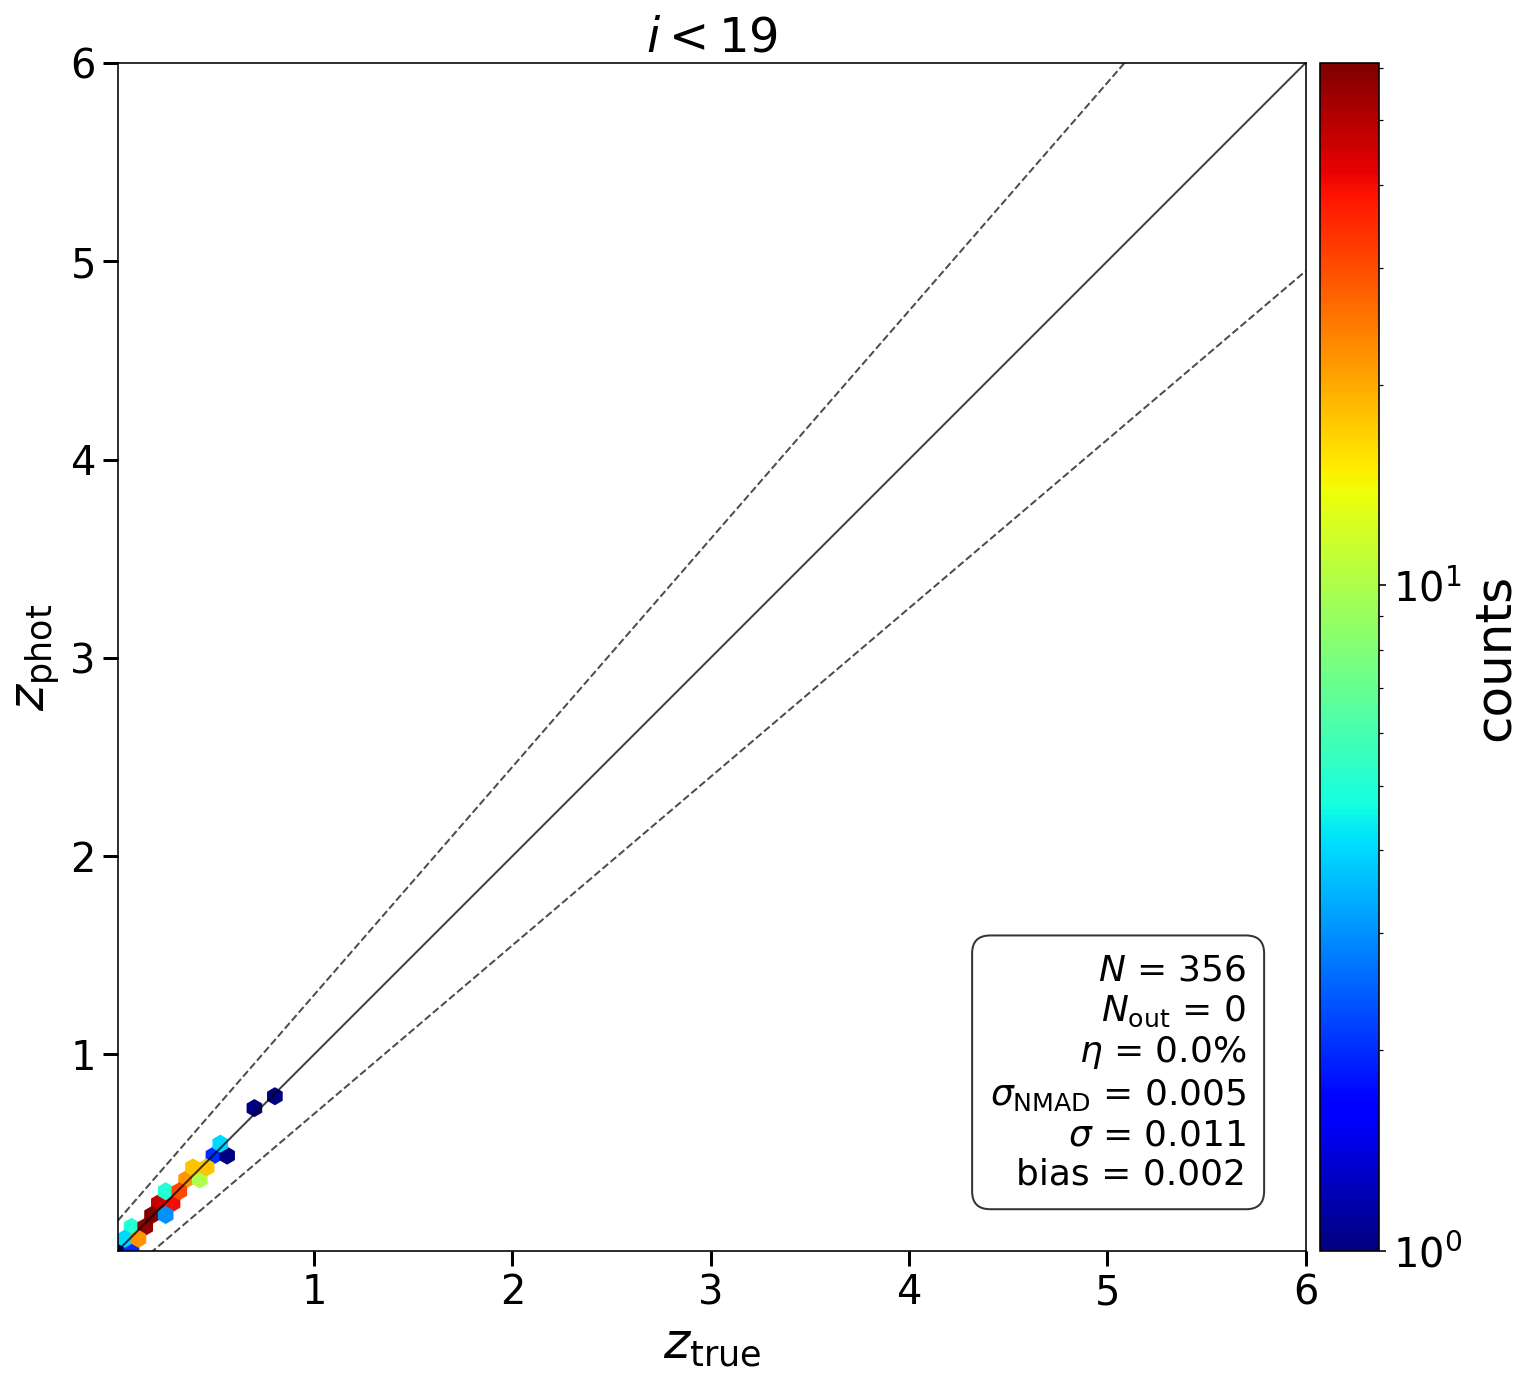

In [27]:
imask = base['HSC_i_MAG'] < 19

id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
                          base['z_phot_chi2'][imask],
                          'Fig1-comp_z_eazypy.png', base['id'][imask],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="$i<19$", xmin=0.01, xmax=6.0, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

Objects : 1226
Outliers: 0




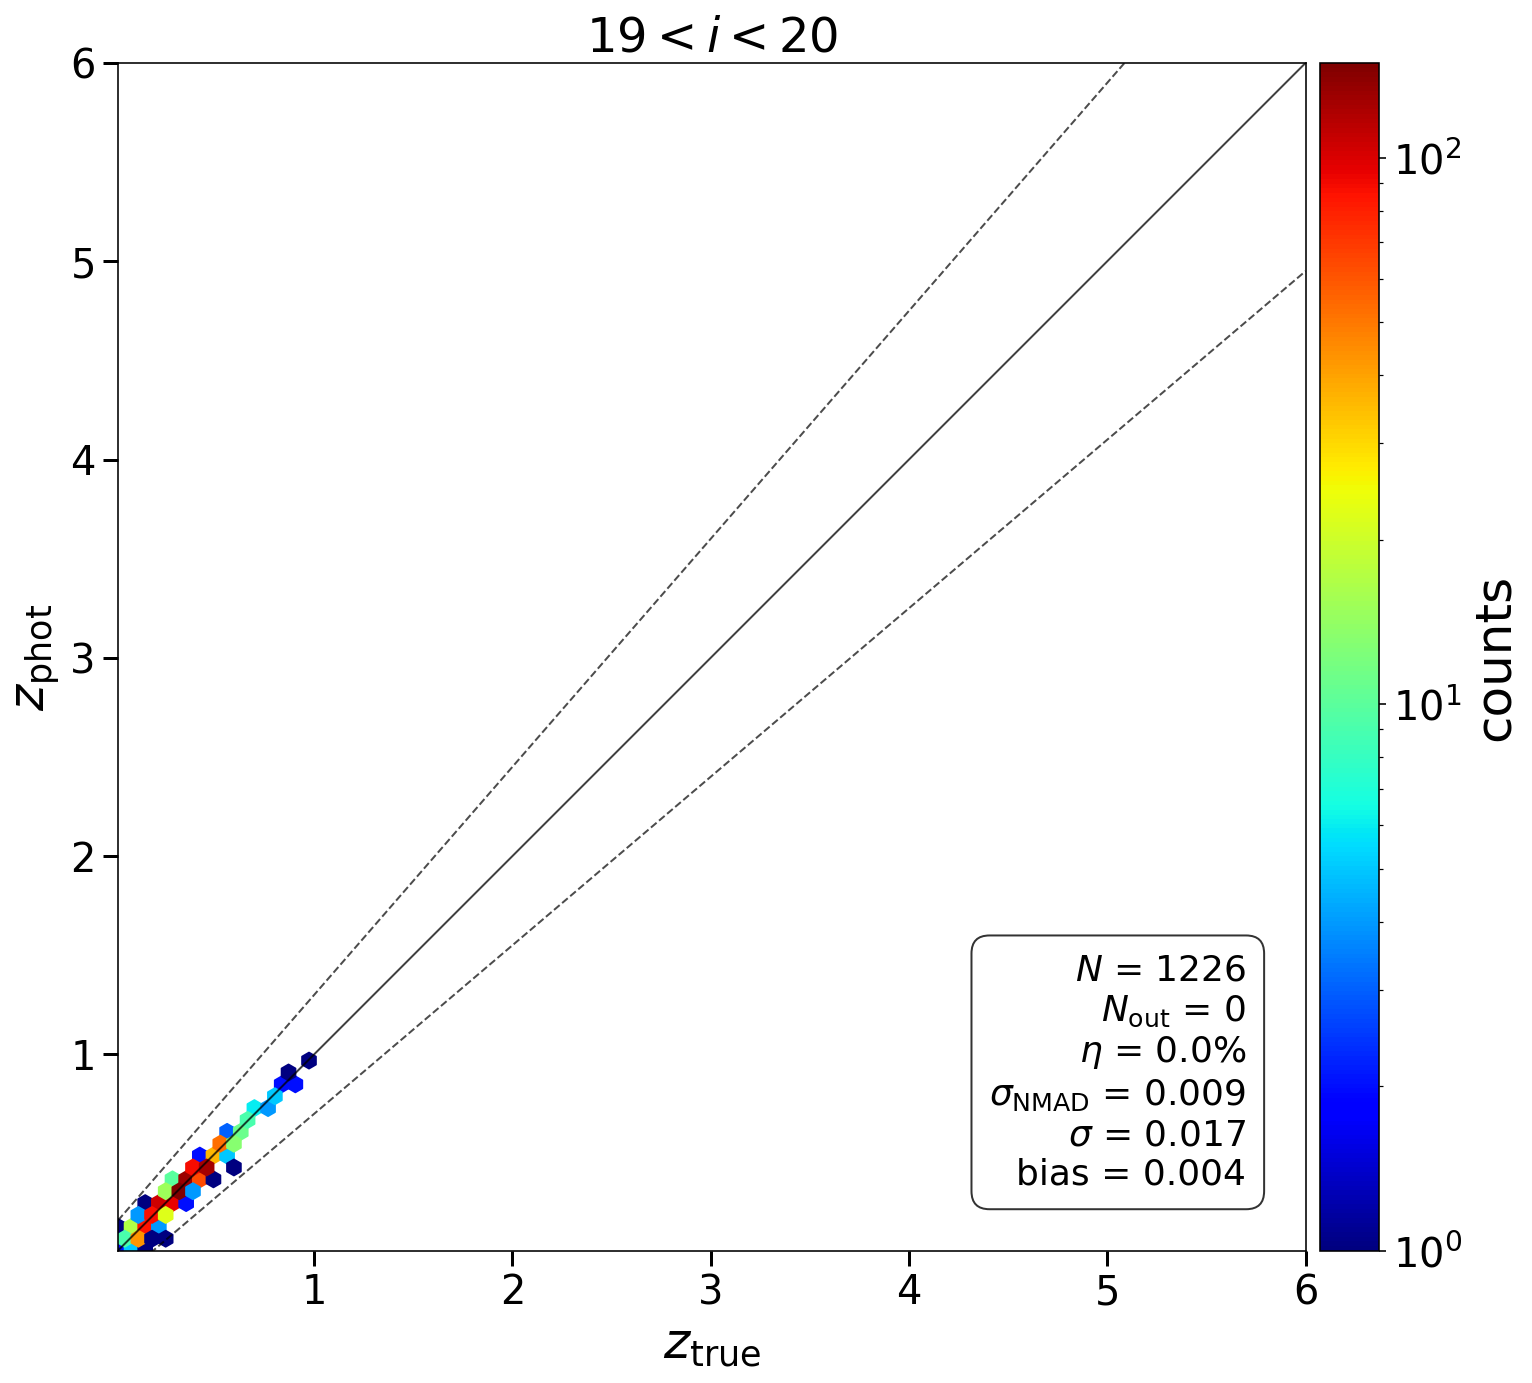

In [28]:
imask = (base['HSC_i_MAG'] > 19) & (base['HSC_i_MAG'] < 20)

id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
                          base['z_phot_chi2'][imask],
                          'Fig1-comp_z_eazypy.png', base['id'][imask],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="$19<i<20$", xmin=0.01, xmax=6.0, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

Objects : 3478
Outliers: 64




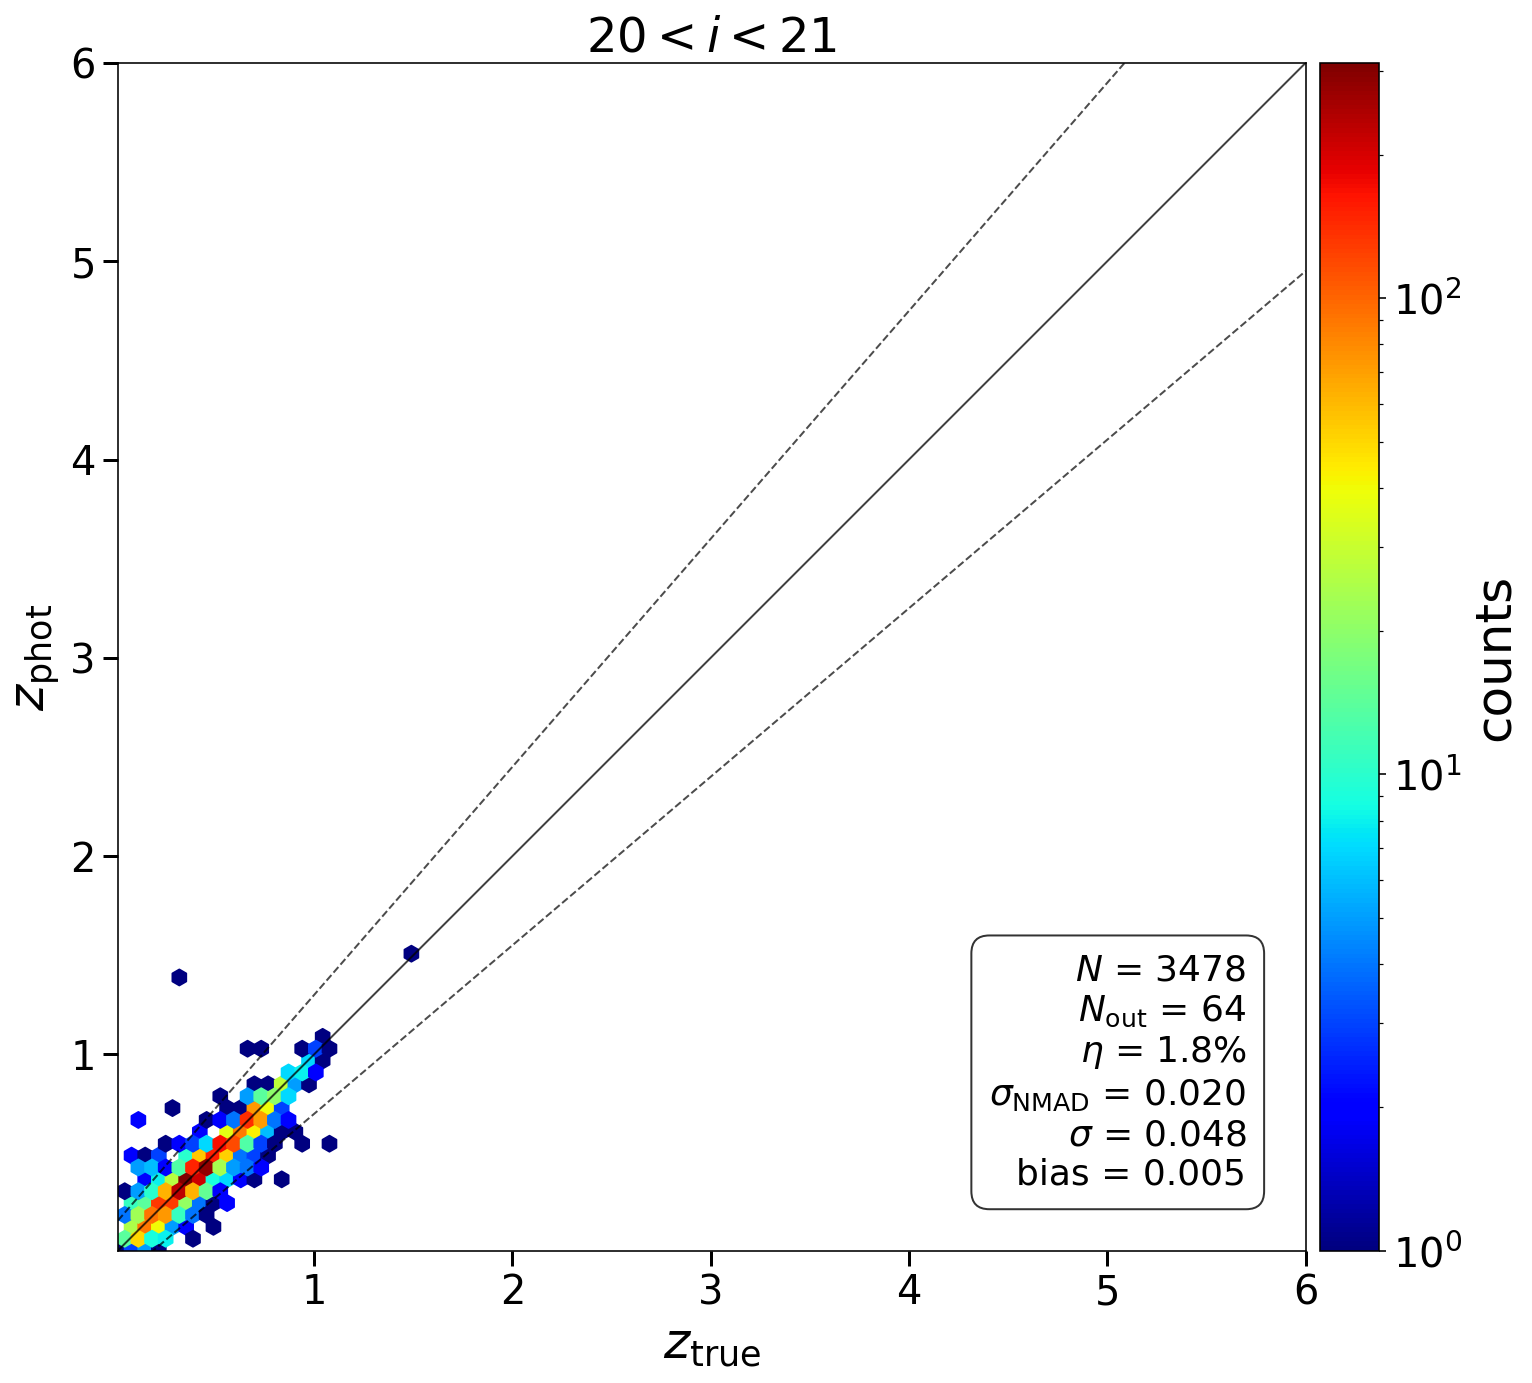

In [29]:
imask = (base['HSC_i_MAG'] > 20) & (base['HSC_i_MAG'] < 21)

id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
                          base['z_phot_chi2'][imask],
                          'Fig1-comp_z_eazypy.png', base['id'][imask],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="$20<i<21$", xmin=0.01, xmax=6.0, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

Objects : 9209
Outliers: 1665




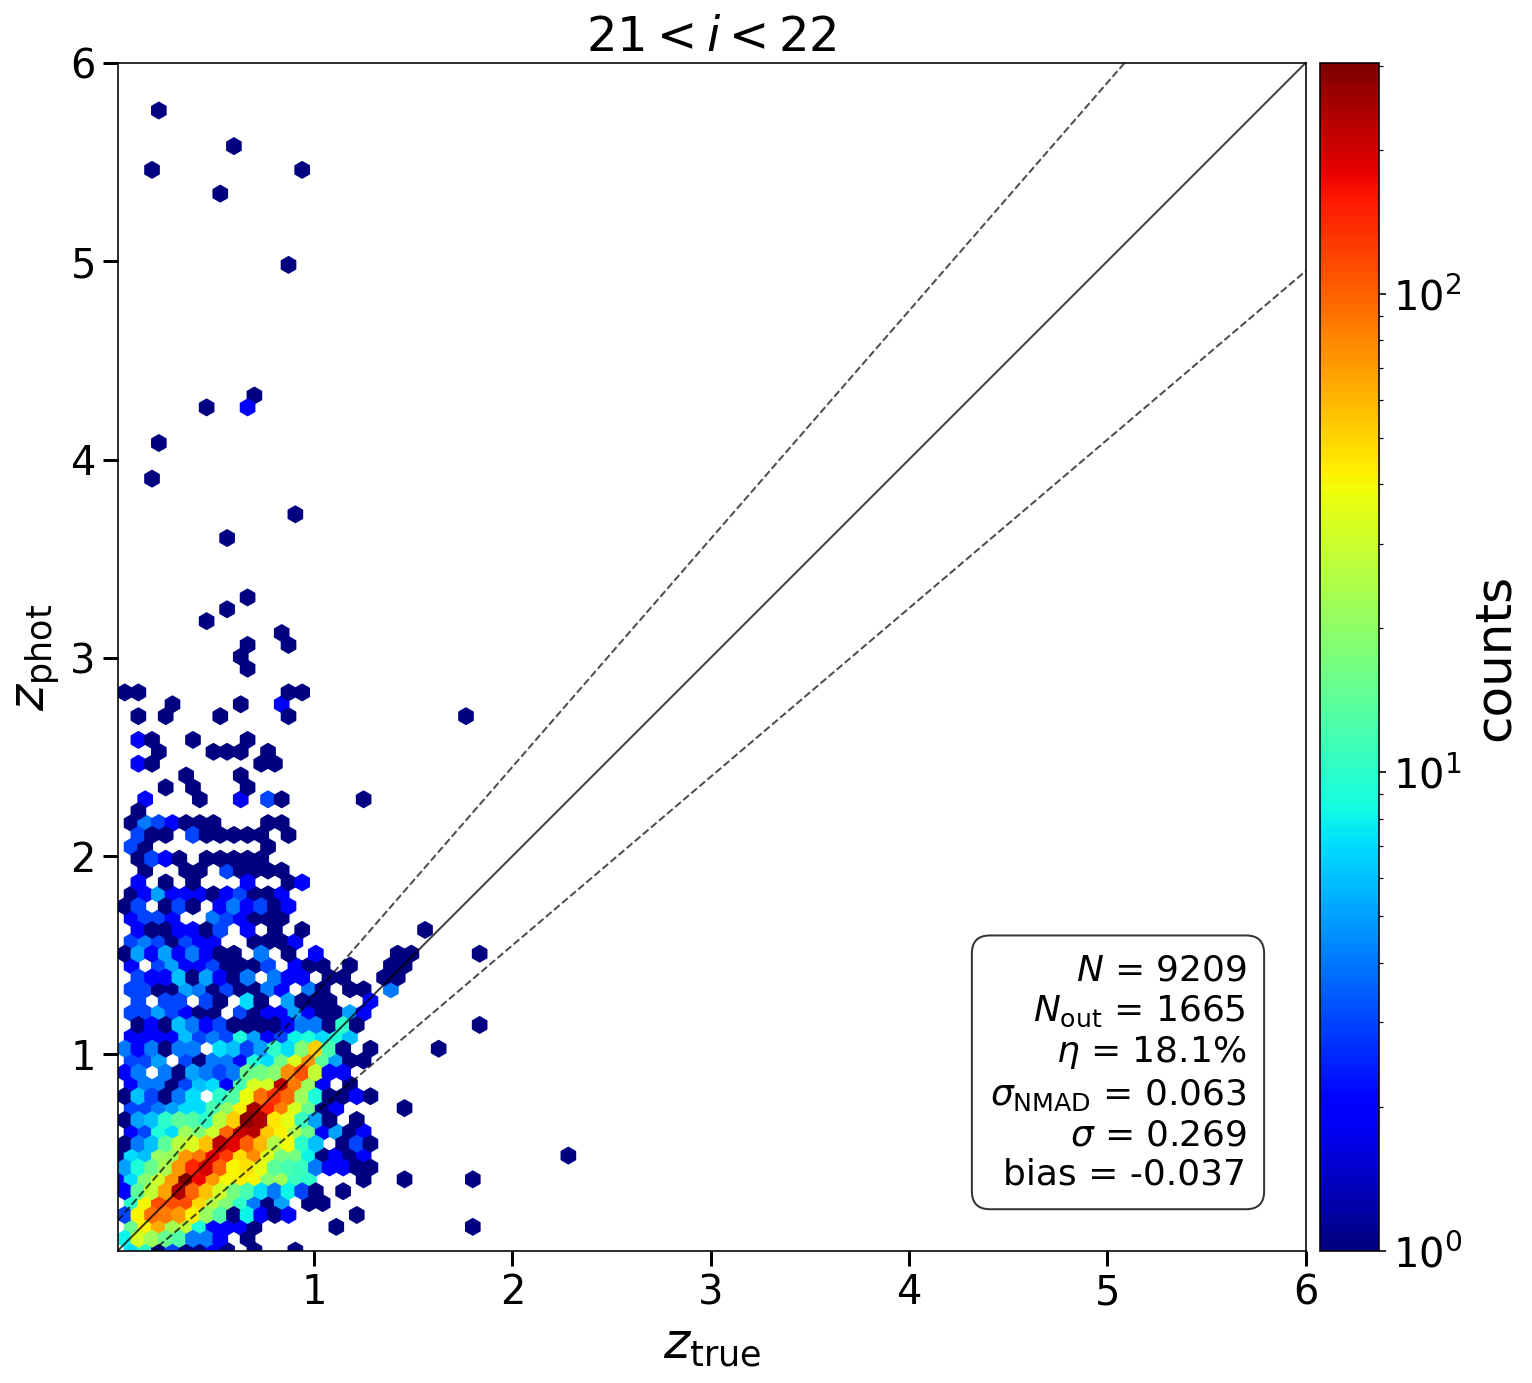

In [30]:
imask = (base['HSC_i_MAG'] > 21) & (base['HSC_i_MAG'] < 22)

id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
                          base['z_phot_chi2'][imask],
                          'Fig1-comp_z_eazypy.png', base['id'][imask],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="$21<i<22$", xmin=0.01, xmax=6.0, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

Objects : 21127
Outliers: 10628




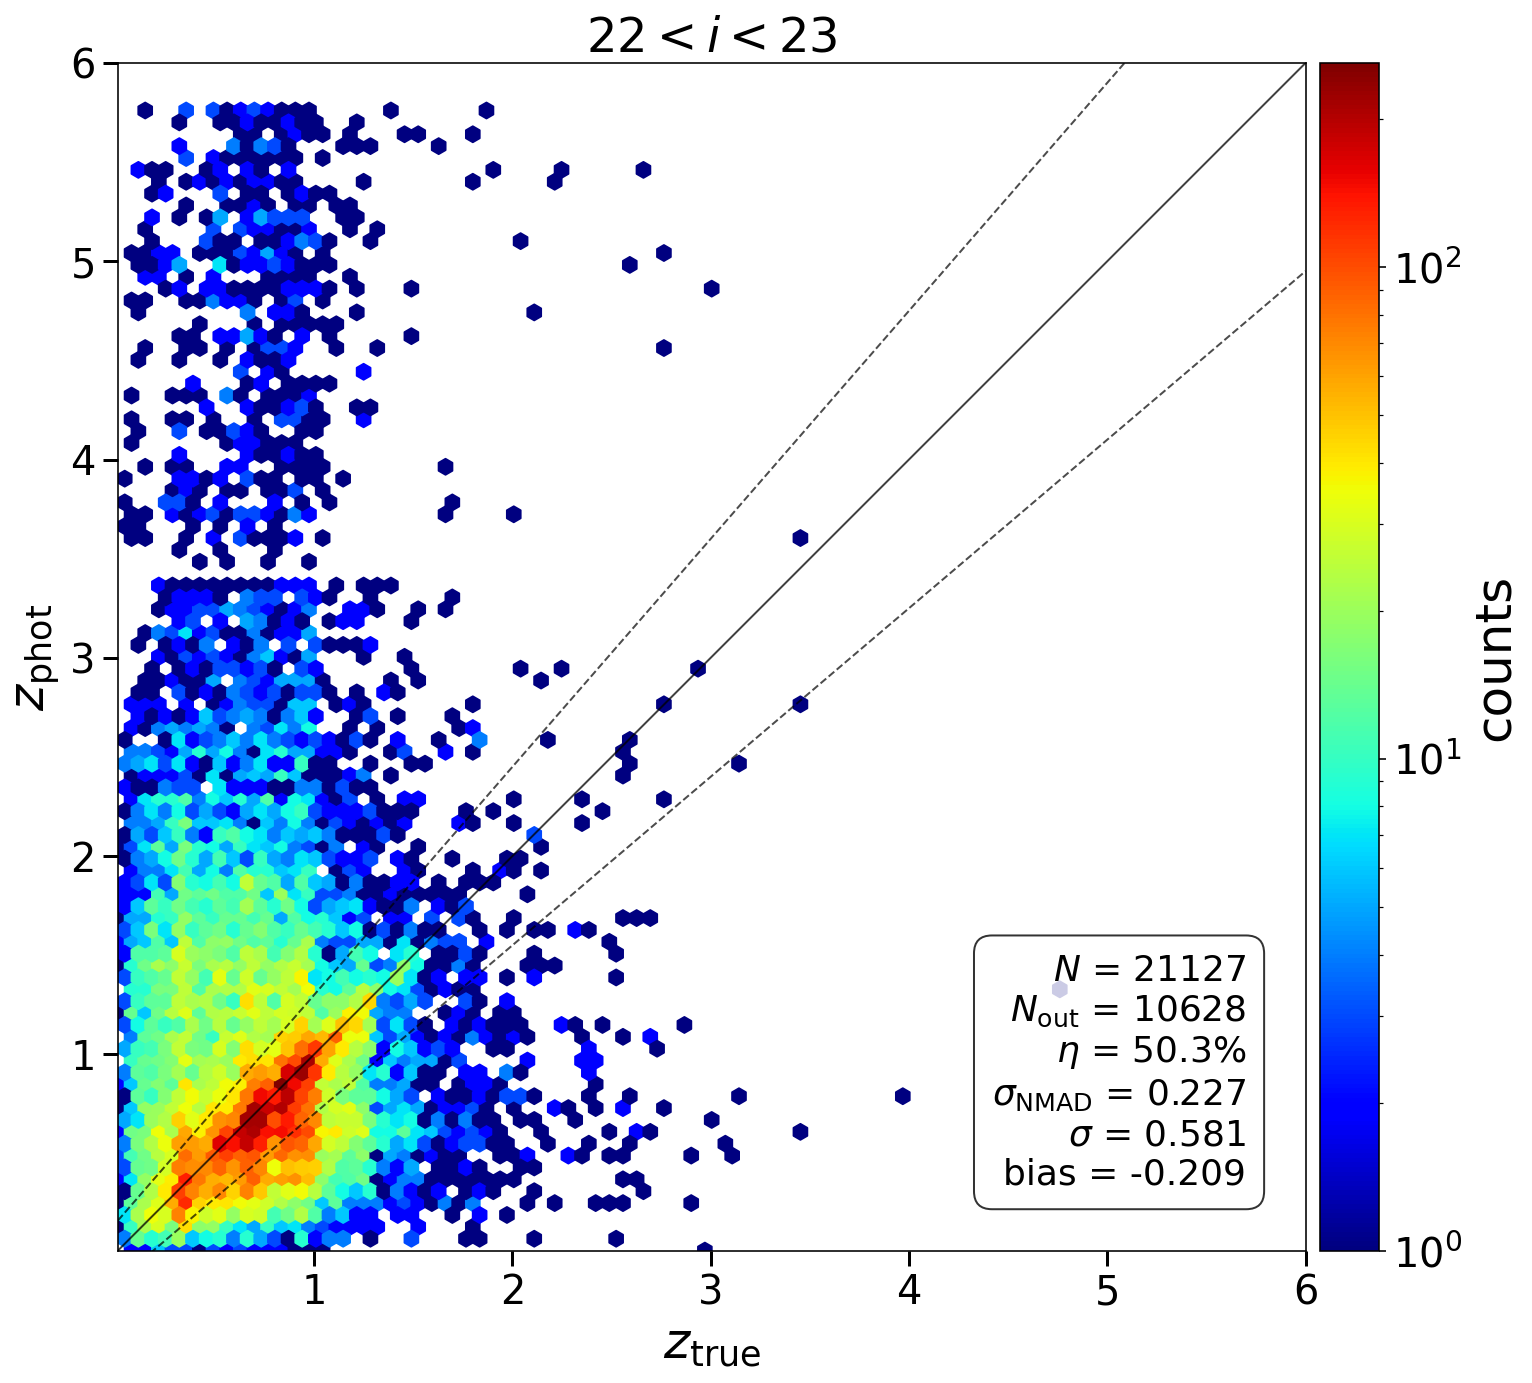

In [31]:
imask = (base['HSC_i_MAG'] > 22) & (base['HSC_i_MAG'] < 23)

id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
                          base['z_phot_chi2'][imask],
                          'Fig1-comp_z_eazypy.png', base['id'][imask],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="$22<i<23$", xmin=0.01, xmax=6.0, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

Objects : 128146
Outliers: 96793




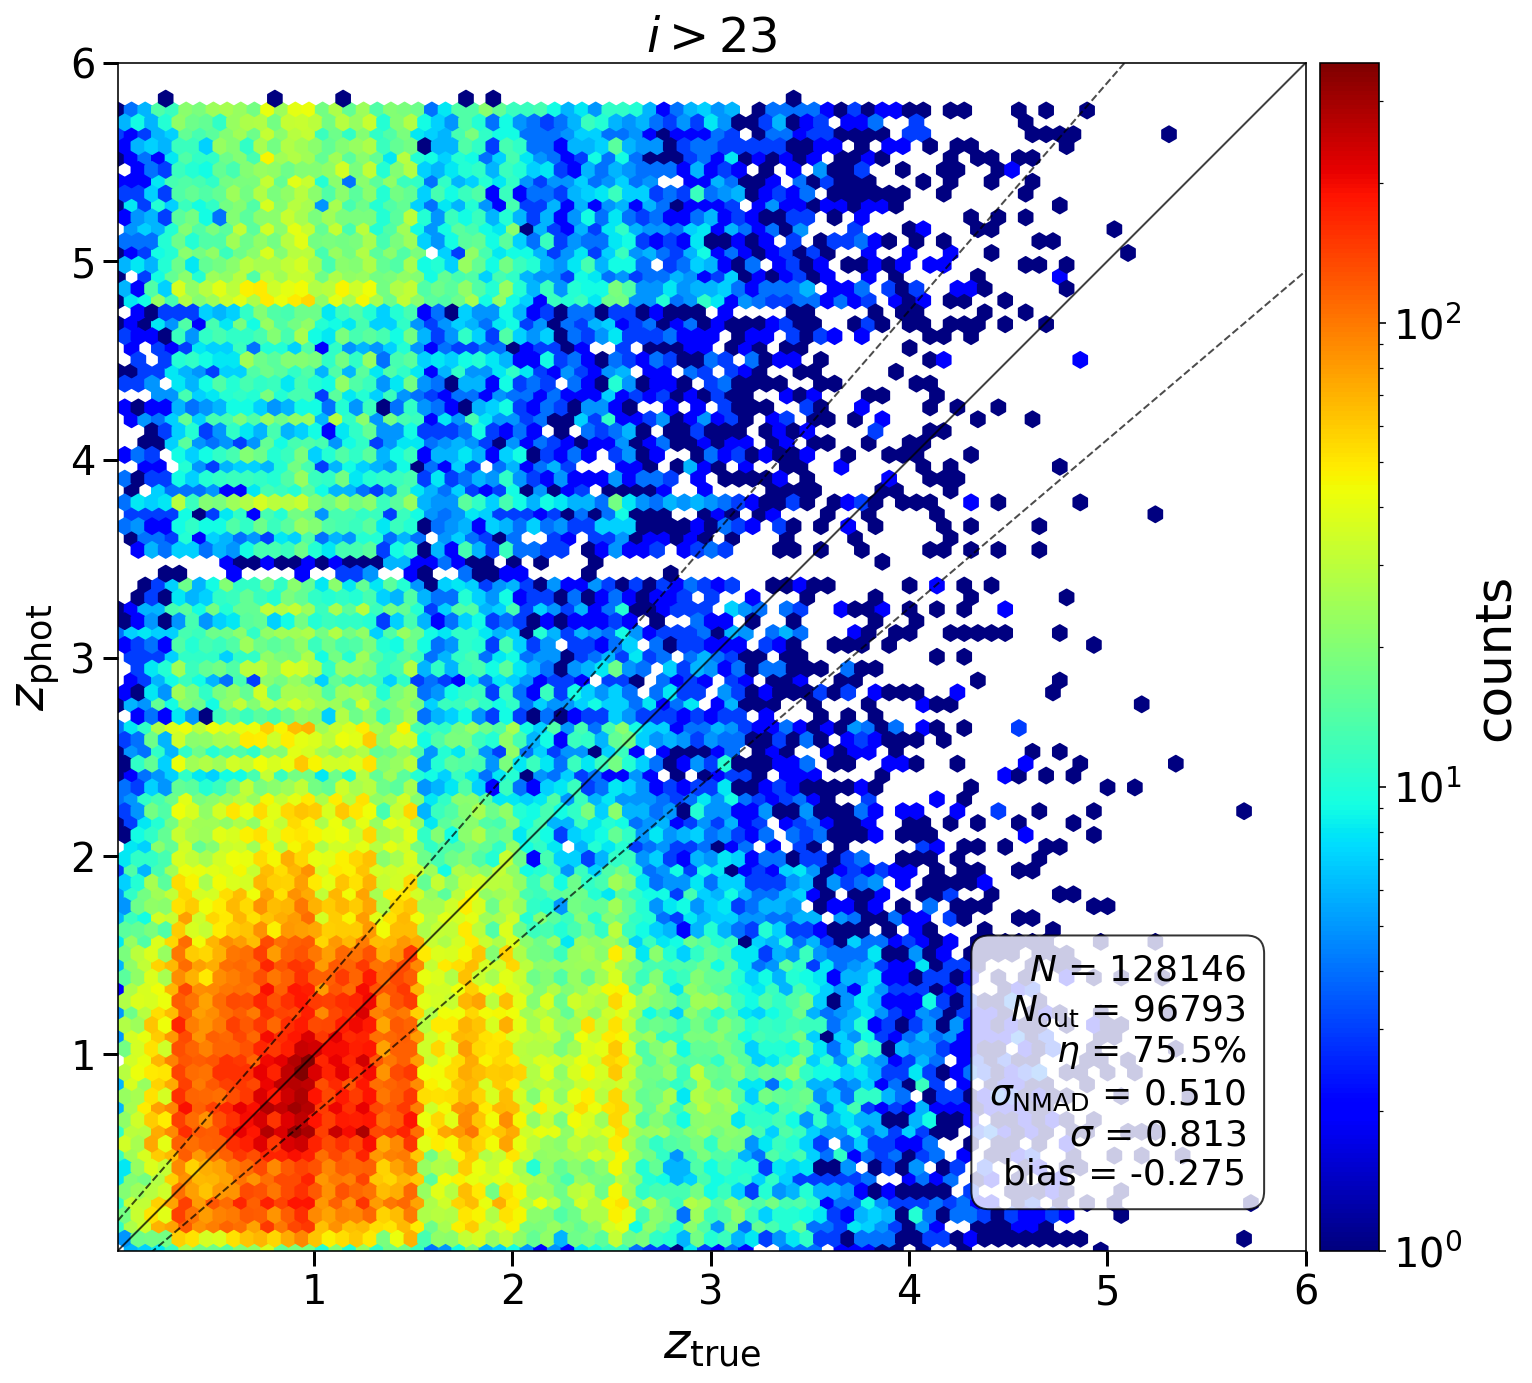

In [32]:
imask = (base['HSC_i_MAG'] > 23)

id_out = plot_comp_hexbin(base['z_true'][imask], base['z_phot'][imask],
                          base['z_phot_chi2'][imask],
                          'Fig1-comp_z_eazypy.png', base['id'][imask],
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title="$i>23$", xmin=0.01, xmax=6.0, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

In [80]:
base['z_phot','z840','z160','z_true']

<Table length=166041>
      z_phot              z840               z160         z_true
     float64            float64            float64       float64
------------------ ------------------ ------------------ -------
 4.932973861694336  4.959109306335449  4.428504943847656  0.7599
1.8793463706970215 1.8716691732406616 0.6763290762901306  0.7945
1.1483078002929688 2.0272018909454346 0.6264314651489258  0.8346
1.3533706665039062  2.809427499771118 0.7311638593673706  1.3229
 1.362594485282898  2.334406852722168 0.7210865616798401  2.5462
0.6270951628684998 1.5831598043441772 0.6059051156044006  0.9406
 0.407390296459198  4.929917812347412 0.8365136384963989  0.7415
0.5184130072593689  1.542467474937439 0.3902396559715271  1.5033
 0.977400004863739 0.9895810484886169 0.9170143604278564  0.9333
0.5200905203819275 1.5796422958374023 0.5203837752342224   0.553
               ...                ...                ...     ...
 4.963282585144043 5.1763739585876465 1.3225384950637817  2.3986
1.0032926797866821 1.0182255506515503 0.6376810073852539  1.2371
2.8487014770507812  4.009852409362793 0.6250258684158325  1.2859
0.5190101265907288 0.5301928520202637 0.5081818699836731  0.5319
1.7303985357284546 2.8703525066375732 0.7188252806663513  1.1424
0.4669949412345886  1.759426474571228 0.4546775221824646  1.5068
0.9504008889198303 1.7944506406784058 0.7408753037452698  0.2057
0.7862294912338257 1.4260603189468384 0.5529212951660156  0.9295
0.8016167283058167  5.177880764007568 0.6669787168502808  0.7436
1.0661394596099854   1.73359215259552 0.9902982115745544  1.0144

/tmp/ipykernel_2860869/3119781711.py:1: RuntimeWarning: invalid value encountered in divide
  sigz = (base['z840']-base['z160']) / 2 / (1+base['z_phot'])


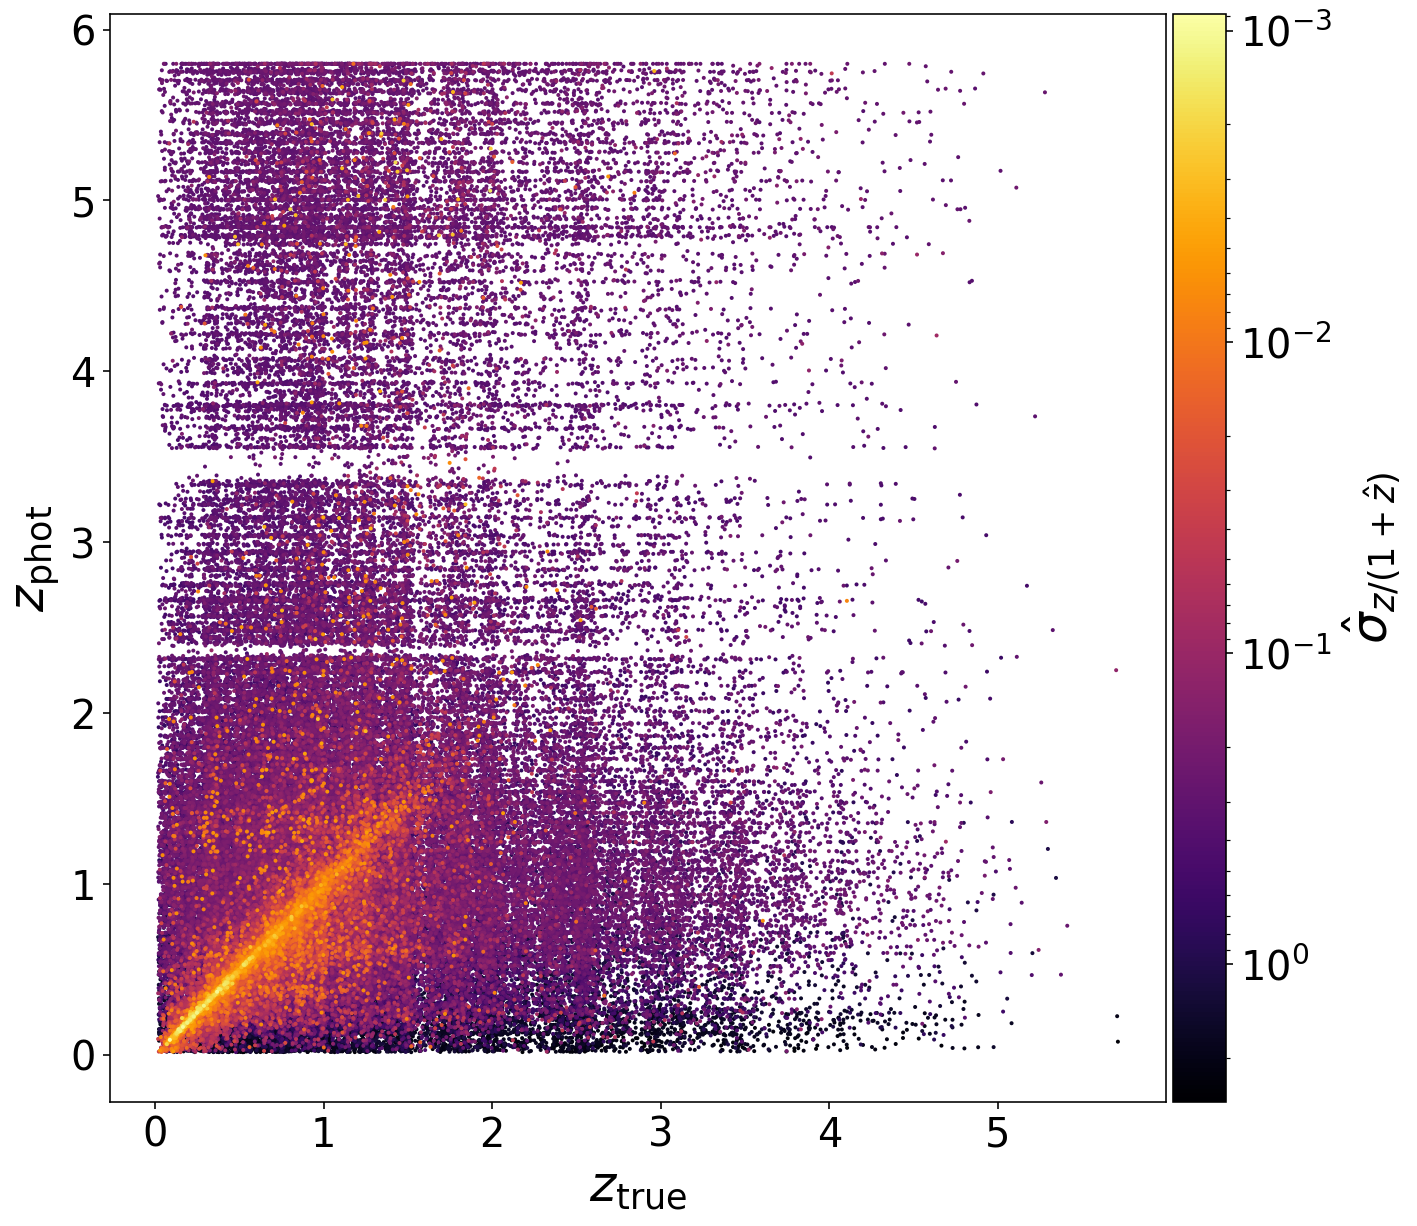

In [102]:
sigz = (base['z840']-base['z160']) / 2 / (1+base['z_phot'])
idxs = np.argsort(sigz)[::-1]
x, y, z = base['z_true'][idxs], base['z_phot'][idxs], sigz[idxs]
sigzmask = (z > 0)

from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
sc = ax.scatter(x[sigzmask], y[sigzmask], c=z[sigzmask], s=1, cmap='inferno_r', norm=LogNorm())
ax.set_xlabel(r'$z_{\rm true}$')
ax.set_ylabel(r'$z_{\rm phot}$')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(sc, cax=cax)
cax.invert_yaxis()
cbar.set_label(r'$\hat{\sigma}_{z/(1+\hat{z})}$')


